In [147]:
import pandas as pd

In [160]:
riders_profile = pd.read_csv('riders_profile.csv',index_col=0)
riders_profile = riders_profile.set_index('UCI ID')
riders_profile

,Rider,Age,Team,Rnk_pcs_ind,Diff._pcs_ind,Pnts_pcs_ind,Rnk_pcs_climb,Diff._pcs_climb,Pnts_pcs_climb,Rnk_pcs_sprint,...,Rnk_pcs_team,Diff._pcs_team,Team_class,Pnts_pcs_team,Rnk_uci_ind,Pnts_uci_ind,Rnk_uci_gc,Pnts_uci_gc,Rnk_uci_team,Pnts_uci_team
UCI ID,,,,,,,,,,,,,,,,,,,,,
1.000327e+10,kristoff alexander,33,UAE-Team Emirates,28.0,-20.0,611.0,724.0,0.0,0.0,17.0,...,6.0,-,WT,6932.0,14.0,1766.00,181.0,128.00,3,4180.00
1.000869e+10,pedersen mads,24,Trek - Segafredo,26.0,72.0,625.0,396.0,128.0,10.0,30.0,...,11.0,-,WT,4949.0,50.0,958.00,280.0,76.00,5,3847.00
1.000940e+10,bol cees,25,Team Sunweb,141.0,-39.0,237.0,687.0,-365.0,2.0,37.0,...,15.0,-,WT,4510.0,216.0,222.88,448.0,41.88,11,2409.42
1.000660e+10,bennett sam,29,Deceuninck - Quick Step,12.0,6.0,828.0,128.0,301.0,58.0,2.0,...,1.0,-,WT,9229.0,51.0,947.50,25.0,709.50,1,4333.83
1.000546e+10,sagan peter,30,BORA - hansgrohe,19.0,-6.0,684.0,116.0,-73.0,68.0,8.0,...,3.0,-,WT,8117.0,8.0,1978.00,44.0,445.00,4,3936.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.001113e+10,sivakov pavel,23,INEOS Grenadiers,57.0,-19.0,431.0,45.0,5.0,225.0,940.0,...,4.0,-,WT,7757.0,67.0,725.00,40.0,475.00,10,2591.00
1.001009e+10,cras steff,24,Lotto Soudal,502.0,97.0,58.0,225.0,169.0,24.0,940.0,...,8.0,-,WT,6013.0,774.0,54.00,453.0,41.00,19,1359.00
1.000759e+10,ledanois kevin,27,Team Arkéa Samsic,420.0,148.0,75.0,724.0,0.0,0.0,343.0,...,25.0,-,PCT,2229.0,420.0,118.00,328.0,63.00,12,2214.00


In [164]:
riders_profile.isna().sum()

Rider               0
Age                 0
Team                0
Rnk_pcs_ind         0
Diff._pcs_ind       0
Pnts_pcs_ind        0
Rnk_pcs_climb       0
Diff._pcs_climb     0
Pnts_pcs_climb      0
Rnk_pcs_sprint      0
Diff._pcs_sprint    0
Pnts_pcs_sprint     0
Rnk_pcs_gc          0
Diff._pcs_gc        0
Pnts_pcs_gc         0
Rnk_pcs_tt          0
Diff._pcs_tt        0
Pnts_pcs_tt         0
Rnk_pcs_team        0
Diff._pcs_team      0
Team_class          0
Pnts_pcs_team       0
Rnk_uci_ind         0
Pnts_uci_ind        0
Rnk_uci_gc          0
Pnts_uci_gc         0
Rnk_uci_team        0
Pnts_uci_team       0
dtype: int64

### Handling nan
#### Rnk -> place rider in last position + 1 \n
#### Diff. (trend) = 0  \n
#### Pnts = 0

In [149]:
Rnk_pcs_indmax = max(riders_profile['Rnk_pcs_ind'])
idx = riders_profile[riders_profile['Rnk_pcs_ind'].isna()].index
riders_profile.loc[idx,'Rnk_pcs_ind'] = Rnk_pcs_indmax + 1
riders_profile.loc[idx,['Diff._pcs_ind','Pnts_pcs_ind']] = 0

In [150]:
Rnk_pcs_clmbmax = max(riders_profile['Rnk_pcs_climb'].dropna())
idx = riders_profile[riders_profile['Rnk_pcs_climb'].isna()].index
riders_profile.loc[idx,'Rnk_pcs_climb'] = Rnk_pcs_clmbmax + 1
riders_profile.loc[idx,['Diff._pcs_climb','Pnts_pcs_climb']] = 0

In [151]:
Rnk_pcs_sprmax = max(riders_profile['Rnk_pcs_sprint'].dropna())
idx = riders_profile[riders_profile['Rnk_pcs_sprint'].isna()].index
riders_profile.loc[idx,'Rnk_pcs_sprint'] = Rnk_pcs_sprmax + 1
riders_profile.loc[idx,['Diff._pcs_sprint','Pnts_pcs_sprint']] = 0

In [152]:
Rnk_pcs_gcmax = max(riders_profile['Rnk_pcs_gc'].dropna())
idx = riders_profile[riders_profile['Rnk_pcs_gc'].isna()].index
riders_profile.loc[idx,'Rnk_pcs_gc'] = Rnk_pcs_gcmax + 1
riders_profile.loc[idx,['Diff._pcs_gc','Pnts_pcs_gc']] = 0

In [153]:
Rnk_pcs_ttmax = max(riders_profile['Rnk_pcs_tt'].dropna())
idx = riders_profile[riders_profile['Rnk_pcs_tt'].isna()].index
riders_profile.loc[idx,'Rnk_pcs_tt'] = Rnk_pcs_ttmax + 1
riders_profile.loc[idx,['Diff._pcs_tt','Pnts_pcs_tt']] = 0

In [162]:
Rnk_uci_ind = max(riders_profile['Rnk_uci_ind'].dropna())
idx = riders_profile[riders_profile['Rnk_uci_ind'].isna()].index
riders_profile.loc[idx,'Rnk_uci_ind'] = Rnk_uci_ind + 1
riders_profile.loc[idx,['Pnts_uci_ind']] = 0

In [163]:
Rnk_uci_gc = max(riders_profile['Rnk_uci_gc'].dropna())
idx = riders_profile[riders_profile['Rnk_uci_gc'].isna()].index
riders_profile.loc[idx,'Rnk_uci_gc'] = Rnk_uci_gc + 1
riders_profile.loc[idx,['Pnts_uci_gc']] = 0

In [51]:
riders_profile.isna().sum()

Rider               0
Age                 0
Team                0
Rnk_pcs_ind         0
Diff._pcs_ind       0
Pnts_pcs_ind        0
Rnk_pcs_climb       0
Diff._pcs_climb     0
Pnts_pcs_climb      0
Rnk_pcs_sprint      0
Diff._pcs_sprint    0
Pnts_pcs_sprint     0
Rnk_pcs_gc          0
Diff._pcs_gc        0
Pnts_pcs_gc         0
Rnk_pcs_tt          0
Diff._pcs_tt        0
Pnts_pcs_tt         0
Rnk_pcs_team        0
Diff._pcs_team      0
Team_class          0
Pnts_pcs_team       0
dtype: int64

In [165]:
riders_profile.to_csv('riders_profile.csv')

In [166]:
riders_profile = pd.read_csv('riders_profile.csv',index_col=0)
riders_profile

,Rider,Age,Team,Rnk_pcs_ind,Diff._pcs_ind,Pnts_pcs_ind,Rnk_pcs_climb,Diff._pcs_climb,Pnts_pcs_climb,Rnk_pcs_sprint,...,Rnk_pcs_team,Diff._pcs_team,Team_class,Pnts_pcs_team,Rnk_uci_ind,Pnts_uci_ind,Rnk_uci_gc,Pnts_uci_gc,Rnk_uci_team,Pnts_uci_team
UCI ID,,,,,,,,,,,,,,,,,,,,,
1.000327e+10,kristoff alexander,33,UAE-Team Emirates,28.0,-20.0,611.0,724.0,0.0,0.0,17.0,...,6.0,-,WT,6932.0,14.0,1766.00,181.0,128.00,3,4180.00
1.000869e+10,pedersen mads,24,Trek - Segafredo,26.0,72.0,625.0,396.0,128.0,10.0,30.0,...,11.0,-,WT,4949.0,50.0,958.00,280.0,76.00,5,3847.00
1.000940e+10,bol cees,25,Team Sunweb,141.0,-39.0,237.0,687.0,-365.0,2.0,37.0,...,15.0,-,WT,4510.0,216.0,222.88,448.0,41.88,11,2409.42
1.000660e+10,bennett sam,29,Deceuninck - Quick Step,12.0,6.0,828.0,128.0,301.0,58.0,2.0,...,1.0,-,WT,9229.0,51.0,947.50,25.0,709.50,1,4333.83
1.000546e+10,sagan peter,30,BORA - hansgrohe,19.0,-6.0,684.0,116.0,-73.0,68.0,8.0,...,3.0,-,WT,8117.0,8.0,1978.00,44.0,445.00,4,3936.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.001113e+10,sivakov pavel,23,INEOS Grenadiers,57.0,-19.0,431.0,45.0,5.0,225.0,940.0,...,4.0,-,WT,7757.0,67.0,725.00,40.0,475.00,10,2591.00
1.001009e+10,cras steff,24,Lotto Soudal,502.0,97.0,58.0,225.0,169.0,24.0,940.0,...,8.0,-,WT,6013.0,774.0,54.00,453.0,41.00,19,1359.00
1.000759e+10,ledanois kevin,27,Team Arkéa Samsic,420.0,148.0,75.0,724.0,0.0,0.0,343.0,...,25.0,-,PCT,2229.0,420.0,118.00,328.0,63.00,12,2214.00


In [167]:
# Relative Trend
riders_profile['Diff._pcs_ind'] = riders_profile['Diff._pcs_ind']/(riders_profile['Diff._pcs_ind']+riders_profile['Rnk_pcs_ind'])
riders_profile['Diff._pcs_climb'] = riders_profile['Diff._pcs_climb']/(riders_profile['Diff._pcs_climb']+riders_profile['Rnk_pcs_climb'])
riders_profile['Diff._pcs_sprint'] = riders_profile['Diff._pcs_sprint']/(riders_profile['Diff._pcs_sprint']+riders_profile['Rnk_pcs_sprint'])
riders_profile['Diff._pcs_gc'] = riders_profile['Diff._pcs_gc']/(riders_profile['Diff._pcs_gc']+riders_profile['Rnk_pcs_gc'])
riders_profile['Diff._pcs_tt'] = riders_profile['Diff._pcs_tt']/(riders_profile['Diff._pcs_tt']+riders_profile['Rnk_pcs_tt'])
riders_profile

,Rider,Age,Team,Rnk_pcs_ind,Diff._pcs_ind,Pnts_pcs_ind,Rnk_pcs_climb,Diff._pcs_climb,Pnts_pcs_climb,Rnk_pcs_sprint,...,Rnk_pcs_team,Diff._pcs_team,Team_class,Pnts_pcs_team,Rnk_uci_ind,Pnts_uci_ind,Rnk_uci_gc,Pnts_uci_gc,Rnk_uci_team,Pnts_uci_team
UCI ID,,,,,,,,,,,,,,,,,,,,,
1.000327e+10,kristoff alexander,33,UAE-Team Emirates,28.0,-2.500000,611.0,724.0,0.000000,0.0,17.0,...,6.0,-,WT,6932.0,14.0,1766.00,181.0,128.00,3,4180.00
1.000869e+10,pedersen mads,24,Trek - Segafredo,26.0,0.734694,625.0,396.0,0.244275,10.0,30.0,...,11.0,-,WT,4949.0,50.0,958.00,280.0,76.00,5,3847.00
1.000940e+10,bol cees,25,Team Sunweb,141.0,-0.382353,237.0,687.0,-1.133540,2.0,37.0,...,15.0,-,WT,4510.0,216.0,222.88,448.0,41.88,11,2409.42
1.000660e+10,bennett sam,29,Deceuninck - Quick Step,12.0,0.333333,828.0,128.0,0.701632,58.0,2.0,...,1.0,-,WT,9229.0,51.0,947.50,25.0,709.50,1,4333.83
1.000546e+10,sagan peter,30,BORA - hansgrohe,19.0,-0.461538,684.0,116.0,-1.697674,68.0,8.0,...,3.0,-,WT,8117.0,8.0,1978.00,44.0,445.00,4,3936.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.001113e+10,sivakov pavel,23,INEOS Grenadiers,57.0,-0.500000,431.0,45.0,0.100000,225.0,940.0,...,4.0,-,WT,7757.0,67.0,725.00,40.0,475.00,10,2591.00
1.001009e+10,cras steff,24,Lotto Soudal,502.0,0.161937,58.0,225.0,0.428934,24.0,940.0,...,8.0,-,WT,6013.0,774.0,54.00,453.0,41.00,19,1359.00
1.000759e+10,ledanois kevin,27,Team Arkéa Samsic,420.0,0.260563,75.0,724.0,0.000000,0.0,343.0,...,25.0,-,PCT,2229.0,420.0,118.00,328.0,63.00,12,2214.00


In [168]:
from pandas_profiling import ProfileReport
prof = ProfileReport(riders_profile)
prof.to_file(output_file='output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


In [169]:
riders_profile.dtypes

Rider                object
Age                   int64
Team                 object
Rnk_pcs_ind         float64
Diff._pcs_ind       float64
Pnts_pcs_ind        float64
Rnk_pcs_climb       float64
Diff._pcs_climb     float64
Pnts_pcs_climb      float64
Rnk_pcs_sprint      float64
Diff._pcs_sprint    float64
Pnts_pcs_sprint     float64
Rnk_pcs_gc          float64
Diff._pcs_gc        float64
Pnts_pcs_gc         float64
Rnk_pcs_tt          float64
Diff._pcs_tt        float64
Pnts_pcs_tt         float64
Rnk_pcs_team        float64
Diff._pcs_team       object
Team_class           object
Pnts_pcs_team       float64
Rnk_uci_ind         float64
Pnts_uci_ind        float64
Rnk_uci_gc          float64
Pnts_uci_gc         float64
Rnk_uci_team          int64
Pnts_uci_team       float64
dtype: object

In [170]:
num_feats = riders_profile.columns[riders_profile.dtypes != 'object']

In [171]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

pt_yj = PowerTransformer()
pt_bc = PowerTransformer(method='box-cox') # positive only data

In [172]:
df_scaled = pt_yj.fit_transform(riders_profile.loc[:,num_feats])
df_scaled = pd.DataFrame(df_scaled,columns=num_feats,index=riders_profile.Rider)

PowerTransformer applies a power transformation to each feature to make the data more Gaussian-like. Currently, PowerTransformer implements the Yeo-Johnson and Box-Cox transforms. The power transform finds the optimal scaling factor to stabilize variance and mimimize skewness through maximum likelihood estimation. By default, PowerTransformer also applies zero-mean, unit variance normalization to the transformed output. Note that Box-Cox can only be applied to strictly positive data. Income and number of households happen to be strictly positive, but if negative values are present the Yeo-Johnson transformed is to be preferred.

In [173]:
prof_sc = ProfileReport(df_scaled)
prof_sc.to_file(output_file='output_scaled.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


In [174]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

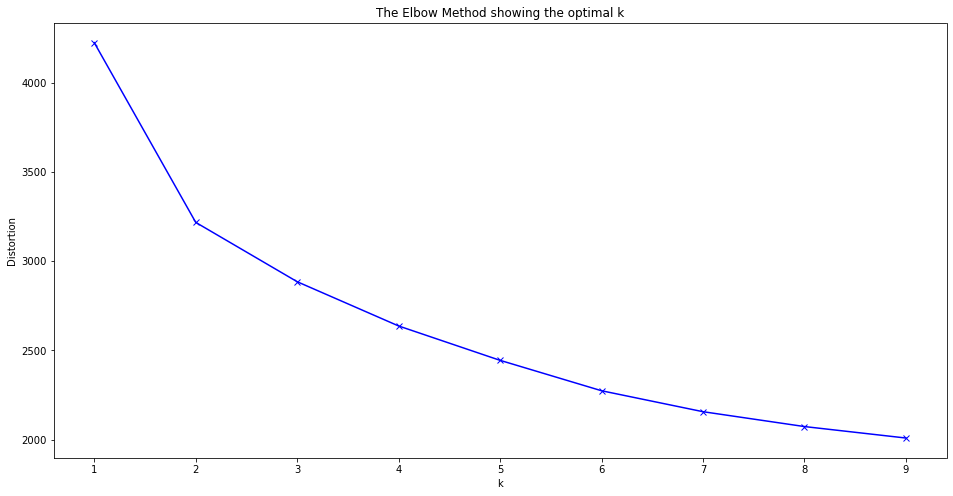

In [175]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [211]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(df_scaled.drop(columns=['Rnk_pcs_ind','Rnk_pcs_climb','Rnk_pcs_sprint','Rnk_pcs_gc','Rnk_pcs_tt','Rnk_pcs_team','Rnk_uci_ind','Pnts_uci_ind','Rnk_uci_gc','Rnk_uci_team','k_means']))
df_scaled['clusters'] = clustering.labels_

In [212]:
clustering.labels_

array([-1,  0,  1,  0, -1, -1, -1,  1,  1,  0,  1,  1,  1,  1,  1,  2, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        3, -1,  1,  1,  2,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  2, -1,  1,  1,
        1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  4,  1,  1,  1,  1, -1,  1,  1,  3,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  2,  1,  1,  1, -1, -1,  1,  2,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  2,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  4,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1], dtype=int64)

In [202]:
kmeanModel = KMeans(n_clusters=4,n_init=10,random_state=0)
kmeanModel.fit(df_scaled.drop(columns=['Rnk_pcs_ind','Rnk_pcs_climb','Rnk_pcs_sprint','Rnk_pcs_gc','Rnk_pcs_tt','Rnk_pcs_team','Rnk_uci_ind','Pnts_uci_ind','Rnk_uci_gc','Rnk_uci_team','k_means']))
df_scaled['k_means']=kmeanModel.predict(df_scaled.drop(columns=['Rnk_pcs_ind','Rnk_pcs_climb','Rnk_pcs_sprint','Rnk_pcs_gc','Rnk_pcs_tt','Rnk_pcs_team','Rnk_uci_ind','Pnts_uci_ind','Rnk_uci_gc','Rnk_uci_team','k_means']))

In [216]:
df_scaled[df_scaled.clusters==2]
# 2 -> climbers??
# 3 -> domestiques
# 0 -> sprinters
# 2 -> gc contenders

,Age,Rnk_pcs_ind,Diff._pcs_ind,Pnts_pcs_ind,Rnk_pcs_climb,Diff._pcs_climb,Pnts_pcs_climb,Rnk_pcs_sprint,Diff._pcs_sprint,Pnts_pcs_sprint,...,Rnk_pcs_team,Pnts_pcs_team,Rnk_uci_ind,Pnts_uci_ind,Rnk_uci_gc,Pnts_uci_gc,Rnk_uci_team,Pnts_uci_team,k_means,clusters
Rider,,,,,,,,,,,,,,,,,,,,,
higuita sergio,-1.660497,-1.591542,1.509498,1.523842,-1.089185,-0.658800,1.150282,-0.556616,0.968461,0.910583,...,-0.146141,0.298894,-0.768900,0.884416,-1.259416,1.240247,-0.423722,0.439638,1,2
roglic primoz,0.232345,-2.394126,-0.825925,2.325385,-2.145879,-1.107182,1.909527,-0.256453,1.204821,0.825871,...,-1.604999,1.351810,-2.701967,2.408479,-2.304245,2.564066,-0.746964,0.847048,1,2
asgreen kasper,-1.079170,-0.287281,-0.691716,0.311064,0.537395,-1.993294,-0.432555,-1.527759,1.791080,1.231261,...,-1.890238,1.741551,-0.900655,1.038008,-0.045149,0.038815,-1.917241,1.500607,1,2
grossschartner felix,-0.801740,-0.382148,-0.694920,0.433299,-0.123621,-1.360580,0.141960,-1.270273,1.849692,1.127817,...,-1.362222,1.308166,-0.032728,-0.003244,-0.644099,0.626885,-1.127230,1.235115,1,2
lutsenko alexey,-0.532359,-1.531795,-0.092726,1.485938,-1.262181,-0.471722,1.297184,-0.809122,0.873826,0.986902,...,-0.950968,1.096128,-0.927480,1.057391,-1.295315,1.262150,-1.606638,1.495484,1,2
yates adam,-0.270518,-1.029379,-1.219275,1.051332,-2.045504,1.490088,1.625010,-0.293236,1.021974,0.832852,...,-0.290359,0.342400,-1.252916,1.370208,-1.542933,1.611668,-0.579685,0.514964,1,2
kung stefan,-0.801740,-1.426564,1.549731,1.388495,0.178953,0.516073,-0.171290,-1.136232,-0.342982,1.092809,...,0.376704,-0.232272,-0.955368,1.082309,-0.534616,0.491588,-0.277169,0.270326,1,2


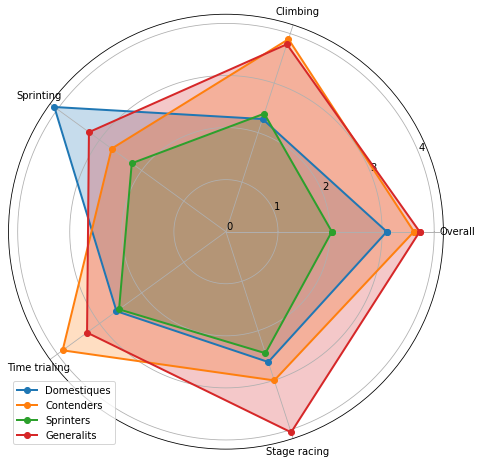

In [196]:
import matplotlib.pyplot as plt
import numpy as np

labels=['Overall', 'Climbing', 'Sprinting', 'Time trialing', 'Stage racing']
markers = [-3, -2, -1, 0, 1]
str_markers = ["0", "1", "2", "3", "4"]
names = ['Domestiques', 'Contenders','Sprinters','Generalits']

labels = np.array(labels)

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
    
fig= plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, polar=True)

for i in range(4):
    data_k = df_scaled[df_scaled.k_means==i]
    stats = np.concatenate(([data_k.Pnts_pcs_ind.mean(),data_k.Pnts_pcs_climb.mean(),data_k.Pnts_pcs_sprint.mean(),data_k.Pnts_pcs_tt.mean(),data_k.Pnts_pcs_gc.mean()],[data_k.Pnts_pcs_ind.mean()]))

    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.yticks(markers,labels=str_markers)
    #ax.set_title(name)
    #fig.set_label(names[i])
ax.legend(names)
ax.grid(True)
plt.show()

In [ ]:
sprinters = df_scaled[df_scaled.k_means==0]
gc = df_scaled[df_scaled.k_means==1]
weak = df_scaled[df_scaled.k_means==2]
climbers = df_scaled[df_scaled.k_means==3]

make_radar_chart("Sprinter", []) # example
make_radar_chart("Contender", [gc.Pnts_pcs_ind.mean(),gc.Pnts_pcs_climb.mean(),gc.Pnts_pcs_sprint.mean(),gc.Pnts_pcs_tt.mean(),gc.Pnts_pcs_gc.mean()])
